<table style="width:100%; background-color:#FFFFFF" align="left">
 <tr>
   <td style="text-align:left; background-color:#FFFFFF">
       <p>Prof. Dr. Stefan Decker <br>
        M. Slupczynski <br>
        L. Neumann <br>
        M. Kißgen <br>
        T. Holzheim</p>
        <p><strong>13-06-2025</strong></p>
     </td>
   <td style="text-align:right; background-color:#FFFFFF">
     <div>
       <img src="https://git.rwth-aachen.de/i5/teaching/dbis-raw/-/raw/main/dbis-logo.png" width="500"/>
     </div>
    </td>
 </tr>
</table> 
<div class="clearfix"></div>
<center>
    <h1> Datenbanken und Informationssysteme (SoSe 2025)</h1>    
    <h1> Übung 8 - Transaktionsmanagement</h1>
</center>

<center>
    <h4>Abgabe bis 20-06-2025 14:15 Uhr</h4>
    <strong>Zu spät eingereichte Übungen werden nicht berücksichtigt.</strong>
</center>

<div class="hidden-print"><hr />
<h3> Wichtige Hinweise</h3>
<ul>
<li>Bei Nichtbeachtung dieser Hinweise wird die Abgabe mit 0 Punkten bewertet!</li>
<li>Bitte laden Sie Ihre digitalen Lösungen mit diesem Notebook in Moodle hoch.</li>
<li>Bitte geben Sie Namen, Matrikelnummern auf der schriftlichen Lösung an.</li>
</ul></div>

<strong>Die Lösung zu diesem Übungsblatt wird in den Übungen am 20. Juni und 23. Juni vorgestellt. <br /> 
Bitte beachten Sie auch die aktuellen Ankündigungen im Moodle-Lernraum zur Vorlesung. </strong> <br />
<em>* bezeichnet Bonusaufgaben.</em>
<hr />

<h3>Dokumentations-Notebook</h3>

Wir empfehlen ihnen das zu dieser Übung zugehörige [ Dokumentations-Notebook ](doku/Doku-Transaktionsmanagement.ipynb) zu lesen. Zusätzlich zur der Handhabung der verschiedenen verwendeten Tools werden dort zentrale Konzepte der Vorlesung noch einmal wiederholt. Sie finden das Notebook im <a href="https://moodle.rwth-aachen.de/course/view.php?id=48593">Moodle Lernraum</a>.

<h3>Abgabegruppe</h3>
Es ist möglich die Abgabe in Gruppen von bis zu fünf Personen zu bearbeiten. <strong>Jeder Gruppenteilnehmer muss für sich ein Notebook hochladen</strong>. Wenn Sie in einer Abgabegruppe arbeiten, dürfen die Notebooks der Gruppenteilnehmer den gleichen Inhalt aufweisen. Wenn Sie in einer Gruppe arbeiten, tragen Sie hier bitte alle Gruppenteilnehmer inklusive sich selbst ein. <strong>Eine inkonsistente Angabe von Gruppenmitgliedern bei den Teilnehmern führt im Zweifel zu 0 Punkten für alle Gruppenteilnehmer!</strong> Es ist möglich zwischen den Abgaben die Gruppen zu wechseln.

<h4>Gruppenteilnehmer</h4>
<ul>
    <li>Neo Ahrens, 456647</li>
    <li>Yorck Heilmann, 456599</li>
    <li>Christian Bick, 456513</li>
    <li>Michael Hübner, 457202</li>
    <li>Kai Seeling, 456990</li>
</ul>

<div class="alert alert-info hidden-print">Die folgende Codezelle sollte zu Beginn der Bearbeitung der Übung ausgeführt werden. <br /> Am Ende sollte <b>"OK, es kann los gehen!"</b> stehen. Dies kann ein paar Minuten dauern.</div>

In [2]:
 %pip install -q "dbis-exc-manager~=1.0.2" "graphviz" "dbis-tm>=2.0.3"
error=None
try:
    # import libraries
    import warnings
    from excmanager.Task import Exercise, Task, SubTask
    from dbis_tm import ConflictGraph, ConflictGraphNode, SyntaxCheck

    from IPython.display import display, HTML   
    # Initialize task structure
    exercise = Exercise(8)
    task_1 = Task(exercise, "8.1")
    task_2 = Task(exercise, "8.2")
    task_3 = Task(exercise, "8.3")
    tasks_ready = {"8.1": {}, "8.2": {}, "8.3": {}}
except Exception as e:
    display(HTML(f"<div class='alert alert-danger'><h2>Etwas ist beim import schief gelaufen:</h1>{error}</div>"))
else:
    display(HTML("<div class='alert alert-success'><h1>OK, es kann los gehen!</h1></div>"))

Note: you may need to restart the kernel to use updated packages.


<div class="pull-left">
    <h2> Aufgabe 8.1 (Serialisierbarkeit) </h2>
</div>

<div class="pull-right">
    <h3> (7 Punkte) </h3>
</div>

<div class="pull-left">

<h3>8.1 a)</h3>

</div>

<div class="pull-right">

<h4>(4 Punkte)</h4>

</div>

Bestimmen Sie für die Schedules $s_1$, $s_2$, $s_3$, $s_4$ die bereinigte Konfliktmengen $conf(s_1)$, $conf(s_2)$, $conf(s_3)$, $conf(s_4)$. $s_1$, $s_2$, $s_3$, $s_4$ enthalten Transaktionen $t_1$, $t_2$ und $t_3$, die auf den Datenelementen $a$, $b$, $c$ arbeiten.

$s_1$ = $w_2(z)~w_3(y)~a_2~w_3(z)~r_1(y)~c_3~r_1(x)~r_1(y)~w_1(y)~r_1(x)~w_1(z)~w_1(y)~c_1$  
$s_2$ = $r_2(x)~w_1(y)~r_1(x)~w_2(z)~r_2(z)~c_1~r_3(z)~w_3(y)~w_3(x)~r_3(y)~r_2(z)~c_3~c_2$  
$s_3$ = $r_1(y)~r_2(x)~w_3(z)~r_3(x)~w_3(x)~w_2(x)~w_1(z)~w_3(z)~r_1(z)~c_3~a_1~w_2(x)~w_2(y)~c_2$  
$s_4$ = $w_1(y)~r_3(y)~w_2(z)~c_2~w_3(x)~w_1(z)~w_1(x)~w_1(y)~a_3~c_1$

In [2]:
########################################################
# Gegebene Schedules (bitte nicht ändern)
s1 = "w2(z) w3(y) a2 w3(z) r1(y) c3 r1(x) r1(y) w1(y) r1(x) w1(z) w1(y) c1 "
s2 = "r2(x) w1(y) r1(x) w2(z) r2(z) c1 r3(z) w3(y) w3(x) r3(y) r2(z) c3 c2"
s3 = "r1(y) r2(x) w3(z) r3(x) w3(x) w2(x) w1(z) w3(z) r1(z) c3 a1 w2(x) w2(y) c2"
s4 = "w1(y) r3(y) w2(z) c2 w3(x) w1(z) w1(x) w1(y) a3 c1"
########################################################
# Beispiel für eine Lösung:
#s2_conf = {
#    ("w_2(x)","r_3(x)"),
#    ("r_1(y)","w_2(y)"),
#    ("w_1(y)","w_3(y)")
#}
s1_conf = set()
s2_conf = set()
s3_conf = set()
s4_conf = set()
# IHR CODE HIER

s1_conf = {
    ("w_3(y)", "r_1(y)"),
    ("w_3(y)", "w_1(y)"), 
    ("w_3(z)", "w_1(z)"), #?, ist c3 nicht schon commited
}

s2_conf = {
    ("r_2(x)", "w_3(x)"),
    ("w_1(y)", "w_3(y)"), #?, c1 commited
    ("w_1(y)", "r_3(y)"), #?, c1 commited
    ("r_1(x)", "w_3(x)"), #?, c1 commited
    ("w_2(z)", "r_3(z)"),
}

s3_conf = {
    ("r_2(x)", "w_3(x)"),
    ("r_3(x)", "w_2(x)"), #?, das ex eig. schon
    ("w_3(x)", "w_2(x)"),
}

s4_conf = {
    ("w_2(z)", "w_1(z)"), #?, c2 commited
}

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.1 a1, a2, a3, a4 und mit 1+1+1+1 Punkten
subtask1 = SubTask(task_1, "a1", points = 1)
subtask2 = SubTask(task_1, "a2", points = 1)
subtask3 = SubTask(task_1, "a3", points = 1)
subtask4 = SubTask(task_1, "a4", points = 1)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
tasks_ready[subtask3.task.task][subtask3.subtask] = True
tasks_ready[subtask4.task.task][subtask4.subtask] = True
msg1 = SyntaxCheck.check_conf_set_syntax(s1_conf)
if not msg1 is None:
    warnings.warn(msg1)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
msg2 = SyntaxCheck.check_conf_set_syntax(s2_conf)
if not msg2 is None:
    warnings.warn(msg2)
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
msg3 = SyntaxCheck.check_conf_set_syntax(s3_conf)
if not msg3 is None:
    warnings.warn(msg3)
    tasks_ready[subtask3.task.task][subtask3.subtask] = False
msg4 = SyntaxCheck.check_conf_set_syntax(s4_conf)
if not msg4 is None:
    warnings.warn(msg4)
    tasks_ready[subtask4.task.task][subtask4.subtask] = False

# Bitte ignorieren
subtask1.setSolution(s1_conf)
subtask2.setSolution(s2_conf)
subtask3.setSolution(s3_conf)
subtask4.setSolution(s4_conf)

In [3]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.1 b)</h3>

</div>

<div class="pull-right">

<h4>(3 Punkte)</h4>

</div>

Entscheiden Sie, ob die schedules mit den zugehörigen, bereinigten Konfliktmengen $conf(s_5)$, $conf(s_6)$ konfliktserialisierbar sind. Begründen Sie Ihre Entscheidung mithilfe von Konfliktgraphen. (Gehen Sie davon aus, dass die Transaktionen am Ende alle committen.)

$conf(s_5)$ = $\{(w_1(y), w_2(y)), 
           (w_3(x), w_2(x)), 
           (r_1(x), w_2(x)), 
           (w_2(x), w_3(x)), 
           (r_1(x), w_3(x)), 
           (w_1(y), r_2(y)), 
           (w_3(x), r_1(x))\}$
           
$conf(s_6)$ = $\{(r_1(z), w_2(z)), 
           (r_1(z), w_3(z)), 
           (w_2(z), r_3(z)), 
           (w_2(z), w_3(z))\}$

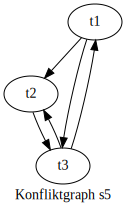

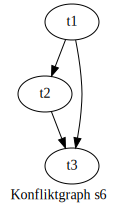

In [4]:
########################################################
# Gegebene Schedules
s5_conf = {('w1(y)', 'w2(y)'), 
           ('w3(x)', 'w2(x)'), 
           ('r1(x)', 'w2(x)'), 
           ('w2(x)', 'w3(x)'), 
           ('r1(x)', 'w3(x)'), 
           ('w1(y)', 'r2(y)'), 
           ('w3(x)', 'r1(x)')}

s6_conf = {('r1(z)', 'w2(z)'), 
           ('r1(z)', 'w3(z)'), 
           ('w2(z)', 'r3(z)'), 
           ('w2(z)', 'w3(z)')}
t1 = ConflictGraphNode(1)
t2 = ConflictGraphNode(2)
t3 = ConflictGraphNode(3)
########################################################
# Konfliktgraph für Schedule s5
conf_g5 = ConflictGraph("s5")
# mit add_edge fügen Sie Knoten zum Konfliktgraphen hinzu
# conf_g5.add_edge(t#,t#)

# Bitte auf True oder False setzen
s5_serializable = None

# Konfliktgraph für Schedule s6
conf_g6 = ConflictGraph("s6")
# mit add_edge fügen Sie Knoten zum Konfliktgraphen hinzu
# conf_g6.add_edge(t#,t#)

# Bitte auf True oder False setzen
s6_serializable = None
# IHR CODE HIER

# s5
conf_g5 = ConflictGraph("s5")
conf_g5.add_edge(t1, t2)  #('w1(y)', 'w2(y)'), ('r1(x)', 'w2(x)'), ('w1(y)', 'r2(y)')
conf_g5.add_edge(t3, t2)  #('w3(x)', 'w2(x)')
conf_g5.add_edge(t2, t3)  #('w2(x)', 'w3(x)')
conf_g5.add_edge(t1, t3)  #('r1(x)', 'w3(x)')
conf_g5.add_edge(t3, t1)  #('w3(x)', 'r1(x)')

# hat Zyklen
s5_serializable = False

# s6
conf_g6 = ConflictGraph("s6")
conf_g6.add_edge(t1, t2)  #('r1(z)', 'w2(z)')
conf_g6.add_edge(t1, t3)  #('r1(z)', 'w3(z)')
conf_g6.add_edge(t2, t3)  #('w2(z)', 'r3(z)'), ('w2(z)', 'w3(z)')

# ist azyklisch
s6_serializable = True


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.1 b1 und b2 mit 1.5+1.5 Punkten
subtask1 = SubTask(task_1, "b1", points = 1.5)
subtask2 = SubTask(task_1, "b2", points = 1.5)

# Graphvisualisierung
display(conf_g5.get_graphviz_graph())
display(conf_g6.get_graphviz_graph())

# Sanity check
tasks_ready[subtask1.task.task][subtask1.subtask] = True
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if s5_serializable == None:
    warnings.warn("Bitte machen Sie eine Angabe für die Serialisierbarkeit von s5")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
if s6_serializable == None:
    warnings.warn("Bitte machen Sie eine Angabe für die Serialisierbarkeit von s6")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False


# Bitte ignorieren
subtask1.setSolution((conf_g5, s5_serializable))
subtask2.setSolution((conf_g6, s6_serializable))

In [5]:
# Autograder, bitte ignorieren

<div class="pull-left">
    <h2> Aufgabe 8.2 (Recovery) </h2>
</div>

<div class="pull-right">
    <h3> (7 Punkte) </h3>
</div>

Für die folgenden Schedules sollen Sie Multiple Choice Fragen zu Schedules und den Klassen $RC$, $ACA$ und $ST$ beantworten. Bitte wählen Sie immer **alle** korrekten Möglichkeiten aus.

<div class="pull-left">

<h3>8.2 a)</h3>

</div>

<div class="pull-right">

<h4>(1 Punkt)</h4>

</div>

Multiple Choice Aufgabe: \
$s_{11}= r_2(z)~r_1(x)~w_2(y)~r_3(y)~w_3(x)~r_3(x)~w_1(z)~a_1~r_3(z)~c_2~c_3$

Welche der Aussagen stimmen für $s_{11}$? Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_{11}$ ist nicht in $RC$ weil: $t_3$ $z$ von $t_1$ in $s_1$ liest und $a_1 <_{s_{11}} c_3$.\
b. $s_{11}$ ist in $RC$.\
c. $s_{11}$ ist nicht in $RC$ weil: $t_3$ $x$ von $t_3$ in $s_1$ liest und $c_3 <_{s_{11}} c_3$. \
d. $s_{11}$ ist nicht in $RC$ weil: $t_3$ $y$ von $t_2$ in $s_1$ liest und $c_2 <_{s_{11}} c_3$. 

In [6]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
result = set()
# IHR CODE HIER
result = {"b"}


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte
# Aufgabe 8.2 a1 mit 0.5 Punkten
subtask1 = SubTask(task_2, "a1", points = 0.5)

tasks_ready[subtask1.task.task][subtask1.subtask] = True
if result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False


# Bitte ignorieren
subtask1.setSolution(result)

In [7]:
# Autograder, bitte ignorieren

Multiple Choice Aufgabe: \
$s_{12} =r_2(y)~r_1(y)~w_1(z)~w_3(z)~a_1~c_3~r_2(z)~r_2(x)~w_2(z)~r_2(x)~w_2(z)~c_2$

Welche der Aussagen stimmen für $s_{12}$?  Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_{12}$ ist nicht in $ST$ wegen: $ r_2(y)<_{s_{12}}r_1(y)<_{s_{12}}c_2$.\
b. $s_{12}$ ist nicht in $ST$ wegen: $ w_1(z)<_{s_{12}}w_3(z)<_{s_{12}}a_1$.\
c. $s_{12}$ ist in $ST$.\
d. $s_{12}$ ist nicht in $ST$ wegen: $ w_2(z)<_{s_{12}}w_2(z)<_{s_{12}}c_2$. 

In [8]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
result = set()
# IHR CODE HIER
result = {"b"}


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 a2 mit 0.5 Punkten
subtask1 = SubTask(task_2, "a2", points = 0.5)

tasks_ready[subtask1.task.task][subtask1.subtask] = True
if result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
    
# Bitte ignorieren
subtask1.setSolution(result)

In [9]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.2 b)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Multiple Choice Aufgabe: \
$s_2$ = $w_3(x)~r_1(z)~w_2(x)~c_2~w_1(x)~r_3(z)~r_1(z)~w_3(x)~w_1(x)~w_1(z)~r_3(x)~c_1~a_3$

Welche der Aussagen stimmen für $s_{2}$?  Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_2$ ist in $RC$.\
b. $s_2$ ist nicht in $RC$ und es gibt exakt 1 Gegenbeispiel.\
c. $s_2$ ist nicht in $RC$ wegen: $t_2$ liest von $t_1 \land c_2 \in s_2$ aber $c_1 \not<_{s_2} c_2$.\
d. $s_2$ ist in $ACA$.\
e. $s_2$ ist nicht in $ACA$ und es gibt exakt 3 Gegenbeispiele.\
f. $s_2$ ist nicht in $ACA$ weil es einen Konflikt auf der Variable $x$ gibt.\
g. $s_2$ ist in $ST$.\
h. $s_2$ ist nicht in $ST$ und es gibt exakt 2 Gegenbeispiele.\
i. $s_2$ ist nicht in $ST$ wegen: $w_3(x)<_{s_2} w_2(x) \land a_3 \not<_{s_2} w_2(x) \land c_3 \not<_{s_2} w_2(x)$.\
j. $s_2$ ist nicht in $ACA$ weil er nicht in $RC$ ist.\
k. $s_2$ ist nicht in $ST$ weil er nicht in $ACA$ ist.

In [10]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
s2_result = set()
# IHR CODE HIER
s2_result = {"a", "f", "i", "k"}


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 b mit 2 Punkten
subtask1 = SubTask(task_2, "b", points = 2)

# Sanity Check
tasks_ready[subtask1.task.task][subtask1.subtask] = True
if s2_result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in s2_result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False


# Bitte ignorieren
subtask1.setSolution(s2_result)

In [11]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.2 c)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Multiple Choice Aufgabe: \
$s_3$ = $r_2(y)~r_2(z)~r_2(x)~w_1(z)~w_1(x)~r_1(z)~r_1(x)~c_1~w_3(y)~w_2(z)~c_3~w_2(z)~c_2$

Welche der Aussagen stimmen für $s_{3}$?  Wählen Sie **alle** zutreffenden Aussagen aus!

a. $s_3$ ist in $RC$.\
b. $s_3$ ist nicht in $RC$ wegen: $t_1 \text{ liest von } t_3 \text{ in } s_3 \land c_1 \in s_3 \land c_3 \not<_{s_3} c_1$.\
c. $s_3$ ist nicht in $RC$ und es gibt exakt 1 Gegenbeispiel.\
d. $s_3$ ist in $ACA$.\
e. $s_3$ ist nicht in $ACA$ und es gibt exakt 2 Gegenbeispiele.\
f. $s_3$ ist nicht in $ACA$ wegen: $t_1 \text{ liest } x \text{ von } t_2 \in s_3 \land c_2 \not<_{s_3} r_1(x)$.\
g. $s_3$ ist in $ST$.\
h. $s_3$ ist nicht in $ST$ wegen: $w_1(z) <_{s_3} w_2(z) \land a_1\not<_{s_3}  w_2(z) \land c_1\not<_{s_3}  w_2(z)$.\
i. $s_3$ ist nicht in $ST$ und es gibt exakt 3 Gegenbeispiele.\
j. $s_3$ ist nicht in $ACA$ weil er nicht in $RC$ ist.\
k. $s_3$ ist nicht in $ST$ weil er nicht in $ACA$ ist.

In [12]:
########################################################
# Bitte beachten Sie die Notation!
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
s3_result = set()
# IHR CODE HIER
s3_result = {'a', 'd', 'g'}


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 c mit 2 Punkten
subtask1 = SubTask(task_2, "c", points = 2)

# Sanity Check
tasks_ready[subtask1.task.task][subtask1.subtask] = True
if s3_result == set():
    warnings.warn(f"Bitte bearbeiten Sie dei Aufgabe.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
elif [i for i in s3_result if type(i)!= str and len(i)!=1]:
    warnings.warn(f"Bitte überprüfen Sie Ihre Antworten, es liegt ein Fehler vor.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False


# Bitte ignorieren
subtask1.setSolution(s3_result)

In [13]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.2 d)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Multiple Choice Aufgabe: \
Der folgende Schedule liegt in $ACA$. \
$s_4$ = $  w_1(x)~w_2(y)~w_1(z)~a_1~r_3(z)~r_2(z)~w_2(x)~w_3(z)~c_3~r_2(y)~r_2(x)~r_2(z)~w_2(y)~c_2$

Welche Aussage gehört zu einem Beweis, dass $s_4$ in $ACA$ liegt?

a. $t_3 \text{ liest } z \text{ von } t_1 \in s_4 \land a_1 <_{s_4} r_3(z)$\
b. $t_2 \text{ liest } y \text{ von } t_3 \in s_4 \land c_3 <_{s_4} r_2(y)$\
c. $t_2 \text{ liest } z \text{ von } t_3 \in s_4 \land c_3 <_{s_4} r_2(z)$\
d. $t_2 \text{ liest } x \text{ von } t_1 \in s_4 \land a_1 <_{s_4} r_2(x)$\
e. $t_3 \text{ liest } y \text{ von } t_2 \in s_4 \land c_2 <_{s_4} r_3(y)$\
f. $t_3 \text{ liest } x \text{ von } t_1 \in s_4 \land a_1 <_{s_4} r_3(x)$

In [14]:
########################################################
# Wenn 'a' eine korrekte Ausssage ist, so fügen sie 'a' zu result hinzu
# Beispiel result ={'a','b','c','d'}
result = set()
# IHR CODE HIER
result = {'c'}

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.2 d mit 2 Punkten
subtask1 = SubTask( task_2, "d", points = 2)

tasks_ready[subtask1.task.task][subtask1.subtask] = True
if result == {}:
    warnings.warn(f"Bitte geben Sie mindestens eine Antwort an.")
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(result)

In [15]:
# Autograder, bitte ignorieren

<div class="pull-left">
    <h2> Aufgabe 8.3 (Scheduling) </h2>
</div>

<div class="pull-right">
    <h3> (6 Punkte) </h3>
</div>

<h1 style="color: red">ACHTUNG</h1>
Die folgenden Teilaufgaben bestehen aus jeweils zwei Parts: <br>
<ul>
<li>Im ersten Part sollen die Ausgaben von C2PL- S2PL- und SS2PL-Schedulern für eine gegebene Transaktion bestimmt werden. Geben Sie bei den Ausgaben der Scheduler das Setzen und Freigeben von Sperren mit an.</li>
<li>Im zweiten Part sollen Sie anhand eines unfertigen schedules feststellen, ob ein Deadlock vorliegt.</li>
</ul></div>
Bitte beachten Sie, dass die Commitreihenfolge eingehalten werden muss! Im ersten Part jedes Aufgabenteils soll Ihre Lösung selbstverständlich deadlockfrei sein.

### Hinweis
Ein Deadlock ist zum Beispiel gegeben, wenn die Transaktion $t_1$ auf einer Sperre, die von $t_2$ gehalten wird, wartet und gleichzeitig die Transaktion $t_2$ auf eine Sperre, die von $t_1$ gehalten wird, wartet, wobei keine dieser Transaktionen ihre Sperren lösen kann.

<div class="pull-left">

<h3>8.3 a)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Gegeben sei $s_{11}$. Bestimmen Sie die Ausgabe eines C2PL-Schedulers für die Eingabe $s_{11}$:

$s_{11}$ = $w_1(y)~c_1~r_2(y)~w_3(z)~r_3(y)~c_3~r_2(y)~w_2(z)~r_2(x)~c_2$

In [16]:
########################################################
# Gegebener Schedule
s11 = "w1(y) c1 r2(y) w3(z) r3(y) c3 r2(y) w2(z) r2(x) c2"
########################################################
# Bitte schreiben Sie Ihre Lösung in folgender Form: 'wl1(x) w1(x) wu1(x) c1'
schedule_11 = ""

# IHR CODE HIER
schedule_11 = "wl1(y) w1(y) wu1(y) c1 wl3(z) rl3(y) w3(z) r3(y) wu3(z) ru3(y) c3 rl2(y) wl2(z) rl2(x) r2(y) r2(y) w2(z) r2(x) ru2(y) wu2(z) ru2(x) c2"


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 a1 mit 1.5 Punkten
subtask1 = SubTask( task_3, "a1", points = 1.5)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
msg=SyntaxCheck.check_schedule_syntax(schedule_11)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
# same check
msg=SyntaxCheck.check(1,s11,schedule_11)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(schedule_11)

In [17]:
# Autograder, bitte ignorieren

Beantworten Sie zusätzlich folgende Frage:

Tritt für folgenden, noch unfertigen Schedule mit C2PL ein Deadlock auf, wenn die Commitreihenfolge eingehalten wird?
<br> Falls ja, geben Sie bitte alle Transaktionen mit den jeweiligen Ressourcen aus dem unfertigen Schedule an, die einen verursachen.

$s_{12}$ = $rl_2(y) ~wl_2(x)~ r_2(y)~ wl_3(z)$

Weitere Operationen $t_1$: $w_1(y)~w_1(y)$<br>
Weitere Operationen $t_2$: $r_2(y)~w_2(x)~r_2(y)$<br>
Weitere Operationen $t_3$: $w_3(z)$ <br>
Commitreihenfolge: $c_3~c_2~c_1$

In [18]:
########################################################
# Gegebener Schedule
s12 = "rl2(y) wl2(x) r2(y) wl3(z)"
########################################################
# Bitte beachten Sie folgende Notation:
# Wenn kein Deadlock auftritt schreiben Sie: result = {False}
# Andernfalls geben Sie den Deadlock in Tupeln an: result = {(1,'x',2),(2,'y',1)}
# - steht für: t_1 wartet auf Freigabe von x von t_2 und t_2 wartet auf Freigabe von y von t_1
result = set()

# IHR CODE HIER
result = {False}

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 a2 mit 0.5 Punkten
subtask2 = SubTask( task_3, "a2", points = 0.5)

# Syntaxcheck
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if len(result) == 0:
    warnings.warn(f"Bitte tragen Sie etwas in result ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
elif type(list(result)[0]) != bool and [i for i in list(result) if  type(i)!= tuple or len(i)!= 3]:
    warnings.warn(f"Bitte tragen Sie in result False oder dreier-Tupel ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False

# Bitte ignorieren
subtask2.setSolution(result)

In [19]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.3 b)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Gegeben sei $s_{21}$. Bestimmen Sie die Ausgabe eines S2PL-Schedulers für die Eingabe $s_{21}$:

$s_{21}$ = $r_3(x)~w_2(x)~w_1(y)~c_3~r_1(z)~c_2~r_1(y)~w_1(y)~r_1(y)~c_1$

In [3]:
########################################################
# Gegebener Schedule
s21 = "r3(x) w2(x) w1(y) c3 r1(z) c2 r1(y) w1(y) r1(y) c1"
########################################################
# Bitte schreiben Sie Ihre Lösung in folgender Form: 'wl1(x) w1(x) wu1(x) c1'
schedule_21 = ""
# IHR CODE HIER
schedule_21 = "rl3(x) r3(x) ru3(x) wl1(y) w1(y) c3 wl2(x) w2(x) wu2(x) rl1(z) r1(z) c2 rl1(y) r1(y) w1(y) r1(y) wu1(y) ru1(z) ru1(y) c1"

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 b1 mit 1.5 Punkten
subtask1 = SubTask( task_3, "b1", points = 1.5)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
msg=SyntaxCheck.check_schedule_syntax(schedule_21)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
# same check
msg=SyntaxCheck.check(2,s21,schedule_21)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(schedule_21)

In [21]:
# Autograder, bitte ignorieren

Beantworten Sie zusätzlich folgende Frage:

Tritt für folgenden, noch unfertigen Schedule mit S2PL ein Deadlock auf, wenn die Commitreihenfolge eingehalten wird?
<br>  Falls ja, geben Sie bitte alle Transaktionen mit den jeweiligen Ressourcen aus dem unfertigen Schedule an, die einen verursachen.

$s_{22}$ = $rl_3(x)~r_3(x)~ru_3(x)~c_3~wl_2(y)~rl_1(z)~r_1(z)~ru_1(z)~wl_1(z)~wl_1(y)~wl_2(x)~wl_2(z)$

Weitere Operationen $t_1$: $w_1(z)~w_1(y)$<br>
Weitere Operationen $t_2$: $w_2(y)~w_2(x)~w_2(z)$<br>
Weitere Operationen $t_3$: Keine <br>
Commitreihenfolge: $c_3~c_1~c_2$

In [22]:
########################################################
# Gegebener Schedule
s22 = "rl3(x) r3(x) ru3(x) c3 wl2(y) rl1(z) r1(z) ru1(z) wl1(z) wl1(y) wl2(x) wl2(z)"
########################################################
# Bitte beachten Sie folgende Notation:
# Wenn kein Deadlock auftritt schreiben Sie: result = {False}
# Andernfalls geben Sie den Deadlock in Tupeln an: result = {(1,'x',2),(2,'y',1)}
# - steht für: t_1 wartet auf Freigabe von x von t_2 und t_2 wartet auf Freigabe von y von t_1
result = set()

# IHR CODE HIER
result = {(1, 'y', 2), (2, 'z', 1)}


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 b2 mit 0.5 Punkt
subtask2 = SubTask( task_3, "b2", points = 0.5)

# Syntaxcheck
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if len(result) == 0:
    warnings.warn(f"Bitte tragen Sie etwas in result ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
elif type(list(result)[0]) != bool and [i for i in list(result) if  type(i)!= tuple or len(i)!= 3]:
    warnings.warn(f"Bitte tragen Sie in result False oder dreier-Tupel ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False

# Bitte ignorieren
subtask2.setSolution(result)

In [23]:
# Autograder, bitte ignorieren

<div class="pull-left">

<h3>8.3 c)</h3>

</div>

<div class="pull-right">

<h4>(2 Punkte)</h4>

</div>

Gegeben sei $s_{31}$. Bestimmen Sie die Ausgabe eines SS2PL-Schedulers für die Eingabe $s_{31}$:

$s_{31}$ = $w_2(z)~r_2(y)~w_1(z)~r_3(y)~r_1(x)~r_3(y)~c_2~c_1~c_3$

In [24]:
########################################################
# Gegebener Schedule
s31 = "w2(z) r2(y) w1(z) r3(y) r1(x) r3(y) c2 c1 c3"
########################################################
# Bitte schreiben Sie Ihre Lösung in folgender Form: 'wl1(x) w1(x) wu1(x) c1'
schedule_31 = ""
# IHR CODE HIER
schedule_31 = "wl2(z) w2(z) rl2(y) r2(y) wu2(z) ru2(y) rl3(y) r3(y) r3(y) ru3(y) c2 wl1(z) w1(z) rl1(x) r1(x) wu1(z) ru1(x) c1 c3"


########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 c1 mit jeweils 1.5 Punkten
subtask1 = SubTask( task_3, "c1", points = 1.5)

# Syntaxcheck
tasks_ready[subtask1.task.task][subtask1.subtask] = True
msg=SyntaxCheck.check_schedule_syntax(schedule_31)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False
# same check
msg=SyntaxCheck.check(3,s31,schedule_31)
if msg != None:
    warnings.warn(msg)
    tasks_ready[subtask1.task.task][subtask1.subtask] = False

# Bitte ignorieren
subtask1.setSolution(schedule_31)

In [25]:
# Autograder, bitte ignorieren

Beantworten Sie zusätzlich folgende Frage:

Tritt für folgenden, noch unfertigen Schedule mit SS2PL ein Deadlock auf, wenn die Commitreihenfolge eingehalten wird?
<br>  Falls ja, geben Sie bitte alle Transaktionen mit den jeweiligen Ressourcen aus dem unfertigen Schedule an, die einen verursachen.

$s_{32}$ = $wl_3(x)~rl_1(y)~r_1(y)~wl_2(z)~w_2(z)~wu_2(z)~c_2~rl_1(z)~wl_1(x)~wl_3(z)$

Weitere Operationen $t_1$: $r_1(z)~w_1(y)~w_1(z)$<br>
Weitere Operationen $t_2$: Keine<br>
Weitere Operationen $t_3$: $w_3(x)~w_3(z)$ <br>
Commitreihenfolge: $c_2,c_1,c_3$

In [26]:
########################################################
# Gegebener Schedule
s32 = "wl3(x) rl1(y) r1(y) wl2(z) w2(z) wu2(z) c2 rl1(z) wl1(x) wl3(z)"
########################################################
# Bitte beachten Sie folgende Notation:
# Wenn kein Deadlock auftritt schreiben Sie: result = {False}
# Andernfalls geben Sie den Deadlock in Tupeln an: result = {(1,'x',2),(2,'y',1)}
# - steht für: t_1 wartet auf Freigabe von x von t_2 und t_2 wartet auf Freigabe von y von t_1
result = set()

# IHR CODE HIER
result = {(1, 'x', 3), (3, 'z', 1)}

########################################################
# DIESEN TEIL NICHT VERÄNDERN, SONST GIBT ES 0 Punkte

# Aufgabe 8.3 c2 mit 0.5 Punkt
subtask2 = SubTask( task_3, "c2", points = 0.5)

# Syntaxcheck
tasks_ready[subtask2.task.task][subtask2.subtask] = True
if len(result) == 0:
    warnings.warn(f"Bitte tragen Sie etwas in result ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False
elif type(list(result)[0]) != bool and [i for i in list(result) if  type(i)!= tuple or len(i)!= 3]:
    warnings.warn(f"Bitte tragen Sie in result False oder dreier-Tupel ein!")
    tasks_ready[subtask2.task.task][subtask2.subtask] = False

# Bitte ignorieren
subtask2.setSolution(result)

In [27]:
# Autograder, bitte ignorieren

# Zusammenfassung

Die folgende Codezelle erlaubt es, die Teilaufgaben 8.1, 8.2 und 8.3 auf syntaktische Korrektheit (z.B. falsche Assertions oder Tippfehler) zu prüfen. Bitte benutzen Sie diese Codezelle, um Ihre Abgaben zu überprüfen. Die Punktzahlangaben in dieser Codezelle dienen nur der Orientierung und geben die __maximal erreichbaren__ Punkte an, nicht die tatsächlich erreichten. 

In [28]:
# overview
tasks =["8.1","8.2","8.3"]
from IPython.display import display, HTML
points = 0

for t in tasks:
    display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}:</h4></div>"))

    task = exercise.getTaskByLabel(t)
    subtasks = task.getSubtasks()
    for i in subtasks:
        display(HTML(f"<div class='alert alert-info'><h4>Sammle Ergebnisse von Teilaufgabe {t}{subtasks[i].subtask}):</h4></div>"))
        try:
            subTaskGraph = subtasks[i].getSolution()
        except Exception as e:
            display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
            continue
        else:
            if not tasks_ready[subtasks[i].task.task][subtasks[i].subtask]:
                display(HTML(f"<div class='alert alert-danger'> Teilaufgabe {t}{subtasks[i].subtask}) wurde nicht ordnungsgemäß ausgeführt.<br /> Überprüfen Sie die Warnings. </div>"))
                continue
            points += subtasks[i].getPoints()
            display(HTML(f"<div class='alert alert-success'> ... BEARBEITET (+max. {subtasks[i].getPoints()} Punkte) </div>"))

display(HTML(f"<div class='alert alert-success'><h3>Es wurden insgesamt Teilaufgaben für max. {points}/20 Punkte gefunden.</h3></div><hr />"))